Dataset Link: https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/data

## Importing Libraries

In [ ]:
import os
import librosa
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.image import resize
import matplotlib.pyplot as plt
import seaborn as sns

### Visualizing Single Audio

In [ ]:
random_file_name = "./blues.00000.wav"

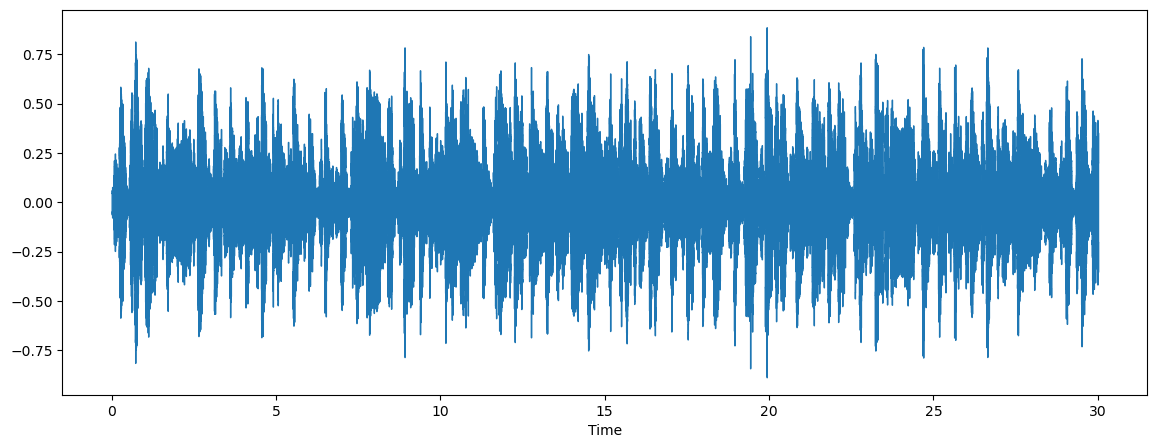

In [ ]:
x, sr = librosa.load(random_file_name, sr=44100)
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)

#### Playing Sound

In [ ]:
from IPython.display import Audio
Audio(data=x, rate=sr)

### Doing Visualization on chunks of audio

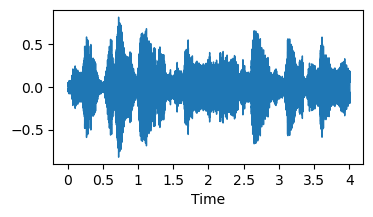

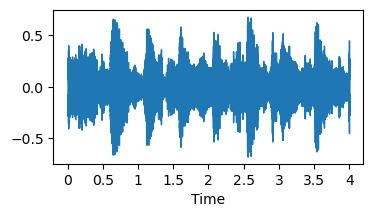

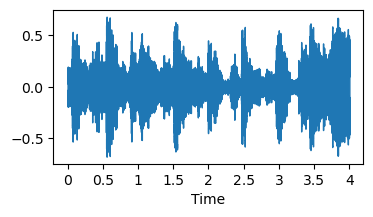

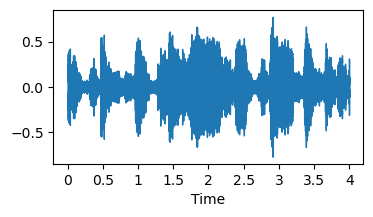

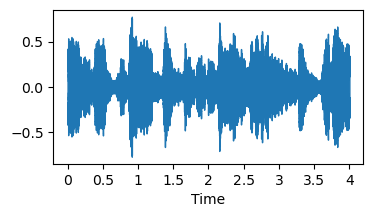

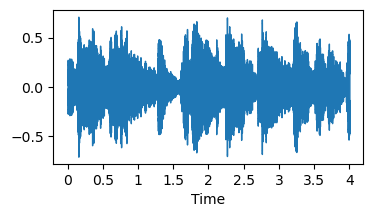

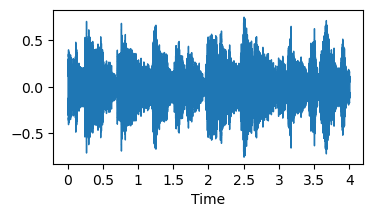

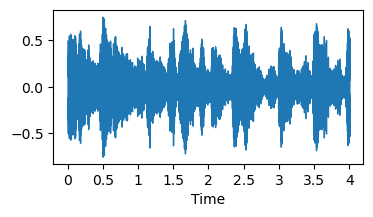

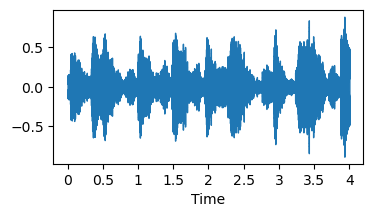

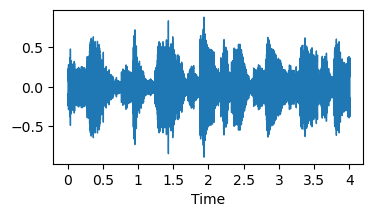

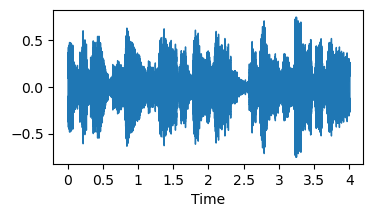

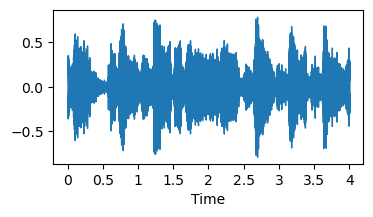

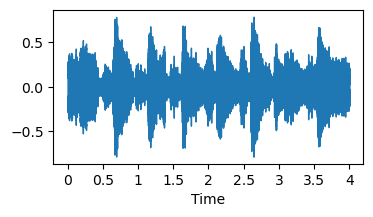

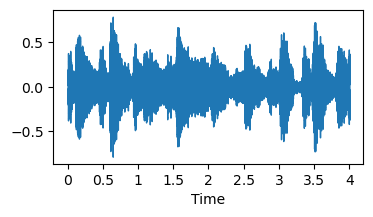

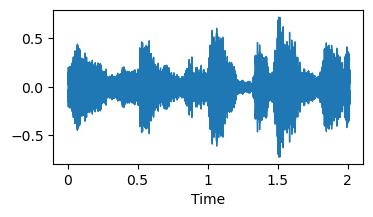

In [ ]:
audio_path = "./blues.00000.wav"
y, sr = librosa.load(audio_path, sr=None)  # sr=None to keep the original sampling rate

# Define the duration of each chunk and overlap
chunk_duration = 4  # seconds
overlap_duration = 2  # seconds

# Convert durations to samples
chunk_samples = chunk_duration * sr
overlap_samples = overlap_duration * sr

# Calculate the number of chunks
num_chunks = int(np.ceil((len(y) - chunk_samples) / (chunk_samples - overlap_samples))) + 1

# Iterate over each chunk
for i in range(num_chunks):
    # Calculate start and end indices of the chunk
    start = i * (chunk_samples - overlap_samples)
    end = start + chunk_samples

    # Extract the chunk of audio
    chunk = y[start:end]
    plt.figure(figsize=(4, 2))
    librosa.display.waveshow(chunk, sr=sr)
    plt.show()


### Melspectrogram Visualization

In [ ]:
#Plotting Melspectrogram of Entire audio
def plot_melspectrogram(y,sr):
    # Compute the spectrogram
    spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
    # Convert to decibels (log scale)
    spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)
    # Visualize the spectrogram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.tight_layout()
    plt.show()

In [ ]:
def plot_melspectrogram_chunks(y,sr):
    # Define the duration of each chunk and overlap
    chunk_duration = 4  # seconds
    overlap_duration = 2  # seconds

    # Convert durations to samples
    chunk_samples = chunk_duration * sr
    overlap_samples = overlap_duration * sr

    # Calculate the number of chunks
    num_chunks = int(np.ceil((len(y) - chunk_samples) / (chunk_samples - overlap_samples))) + 1

    # Iterate over each chunk
    for i in range(num_chunks):
        # Calculate start and end indices of the chunk
        start = i * (chunk_samples - overlap_samples)
        end = start + chunk_samples

        # Extract the chunk of audio
        chunk = y[start:end]

        # Compute the Mel spectrogram for the chunk
        mel_spectrogram = librosa.feature.melspectrogram(y=chunk, sr=sr)
        print(mel_spectrogram.shape)
        spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)
        # Visualize the spectrogram
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
        plt.colorbar(format='%+2.0f dB')
        plt.title('Spectrogram')
        plt.tight_layout()
        plt.show()

(128, 173)


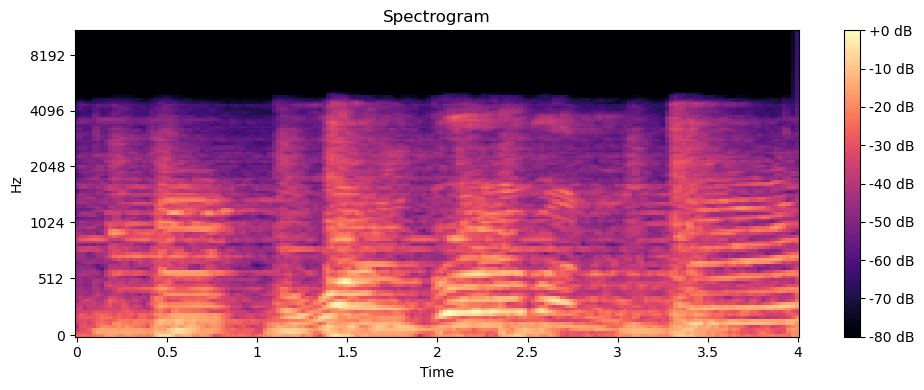

(128, 173)


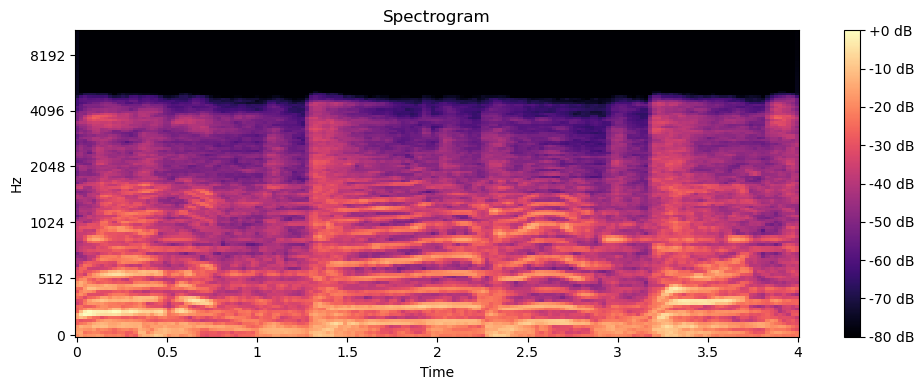

(128, 173)


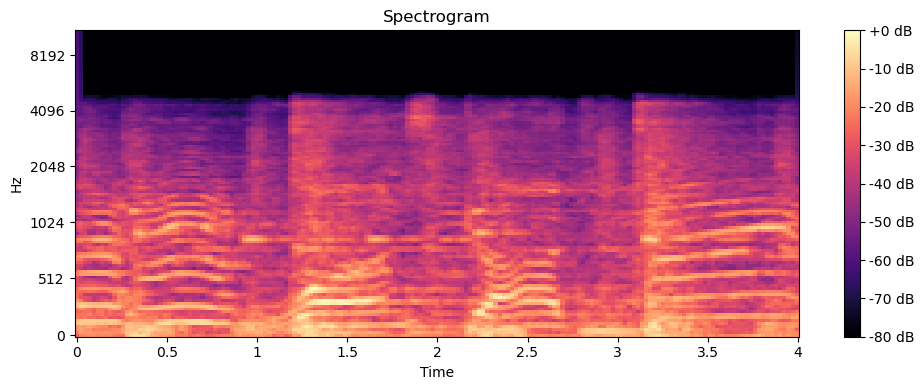

(128, 173)


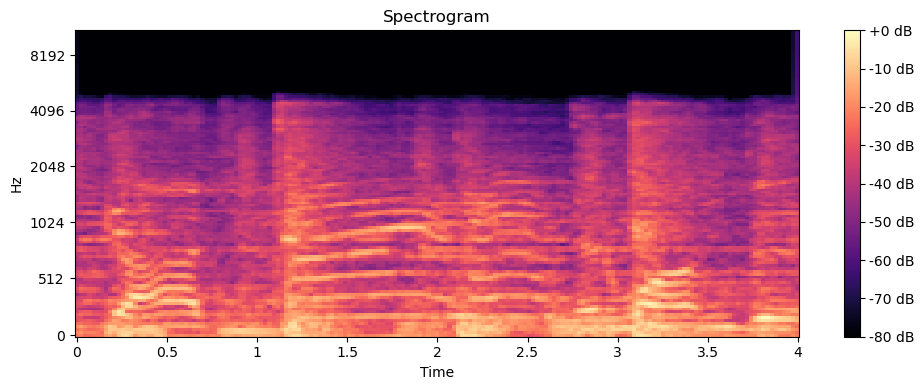

(128, 173)


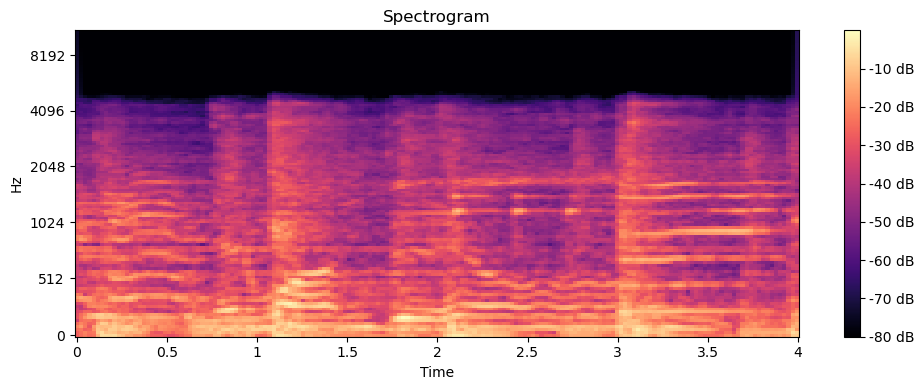

(128, 173)


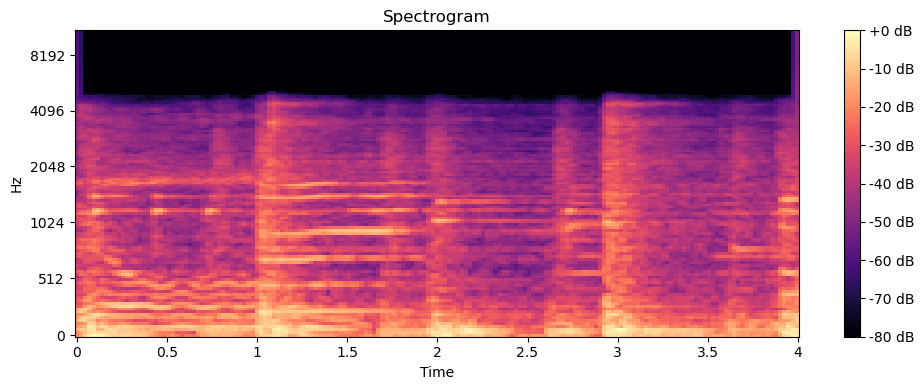

(128, 173)


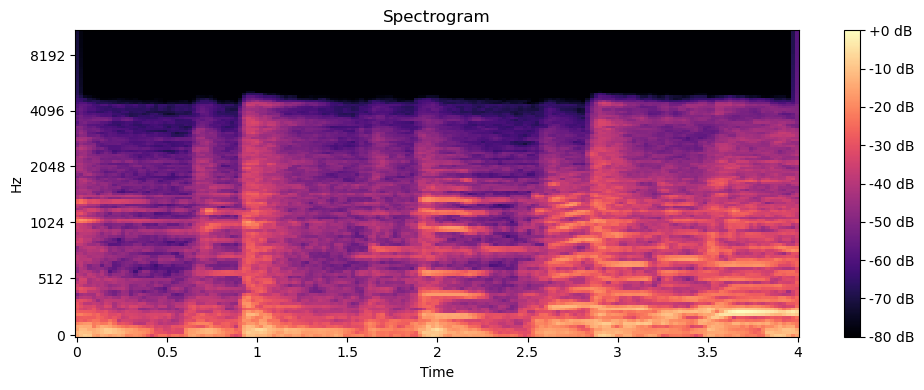

(128, 173)


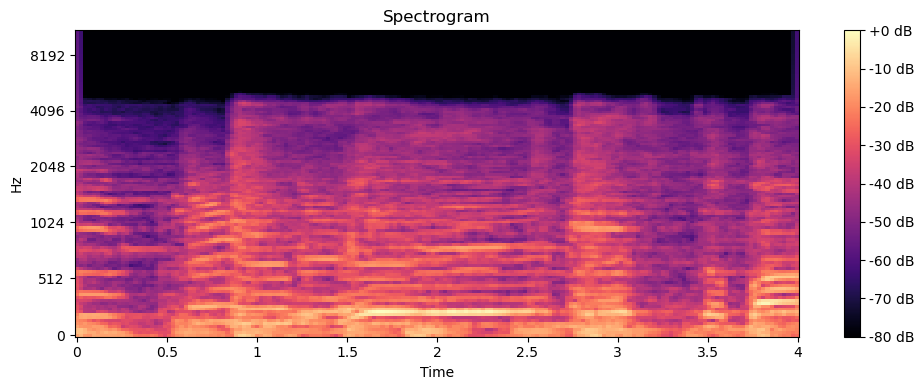

(128, 173)


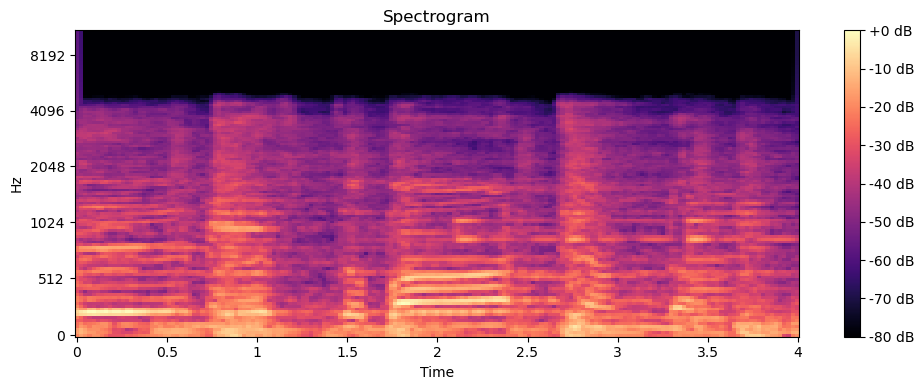

(128, 173)


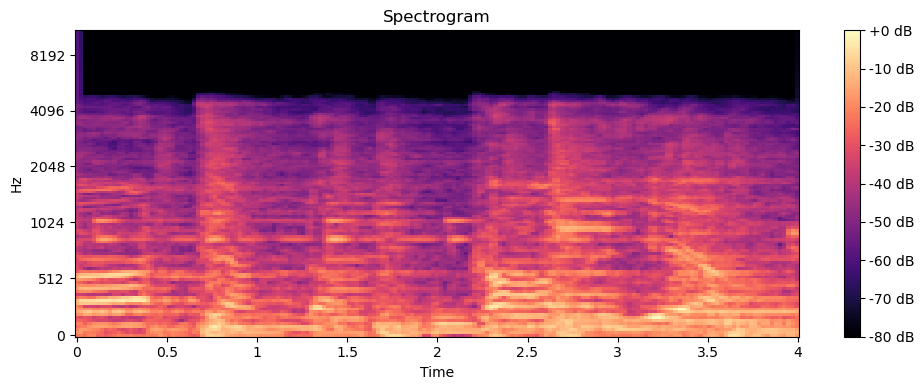

(128, 173)


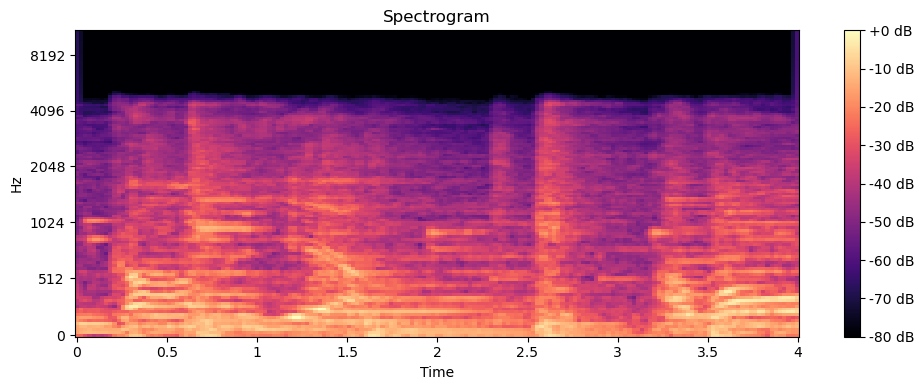

(128, 173)


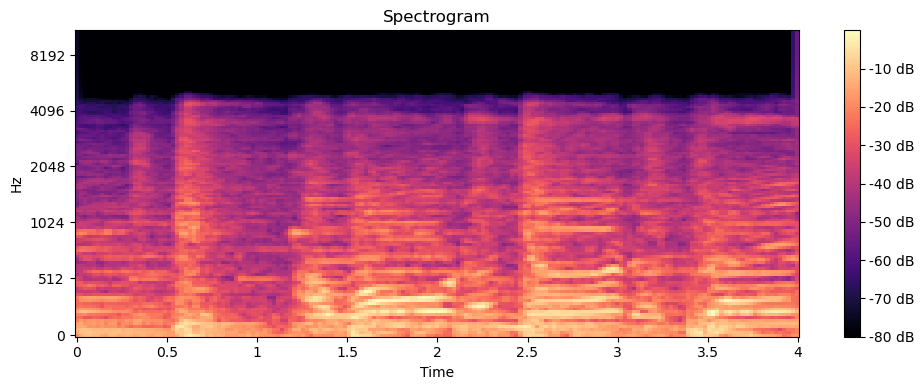

(128, 173)


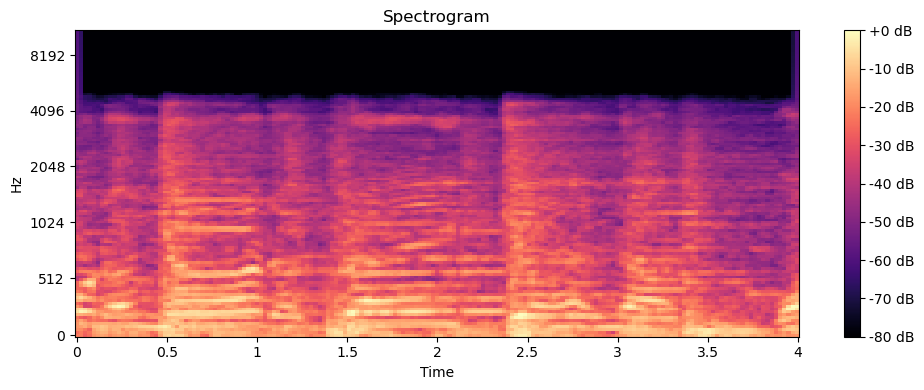

(128, 173)


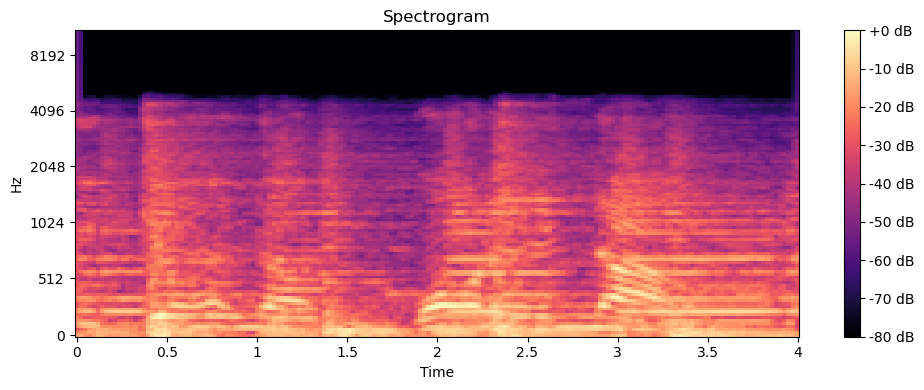

(128, 173)


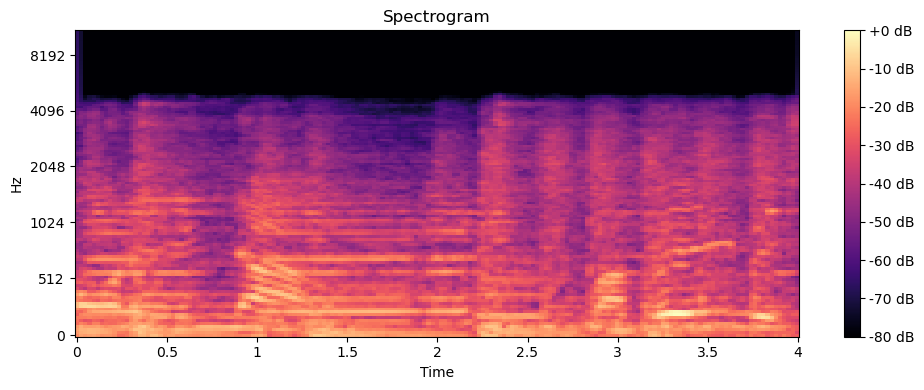

(128, 173)


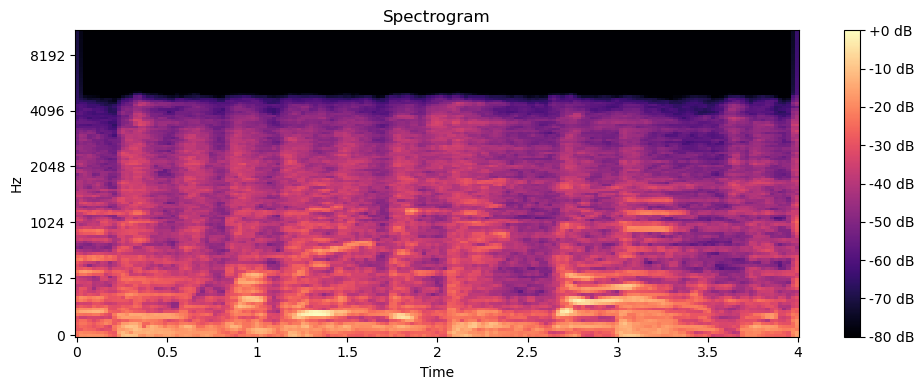

(128, 173)


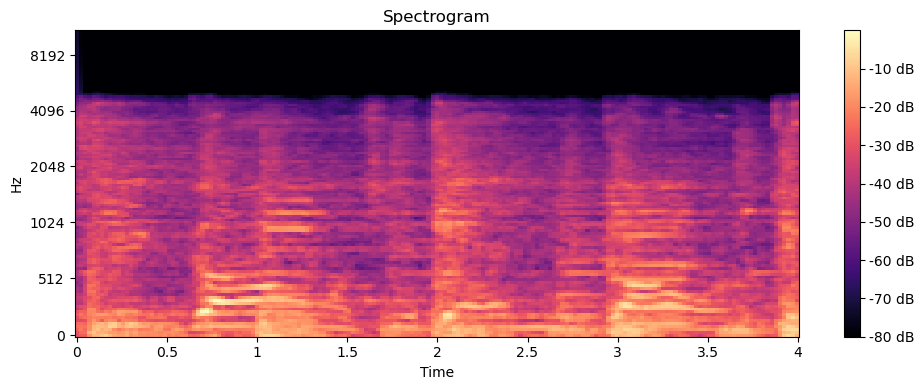

(128, 173)


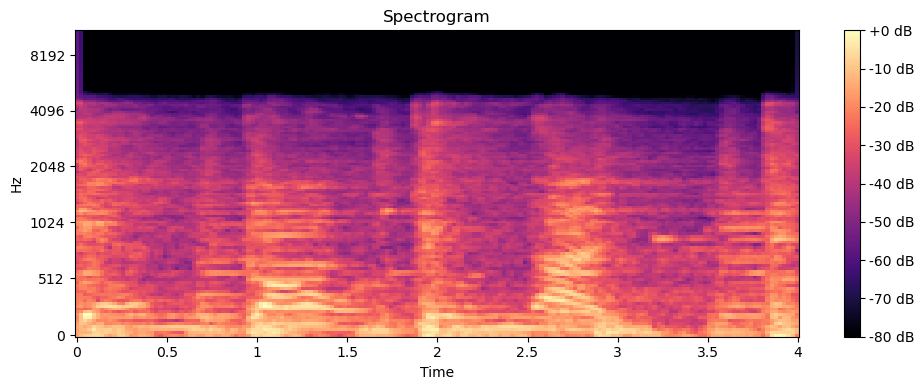

(128, 173)


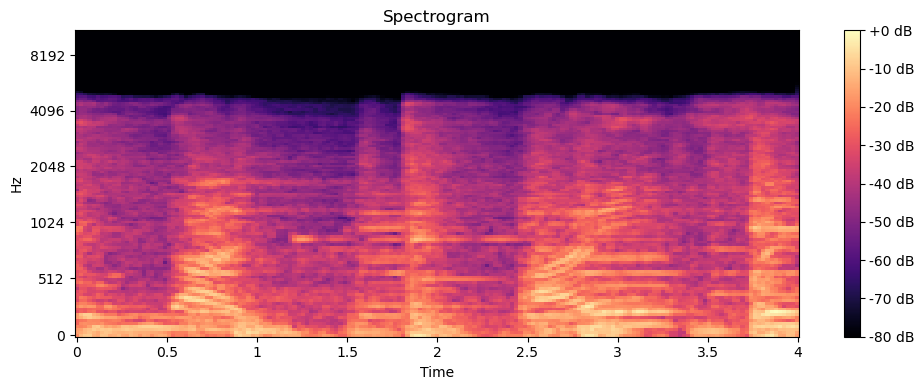

(128, 173)


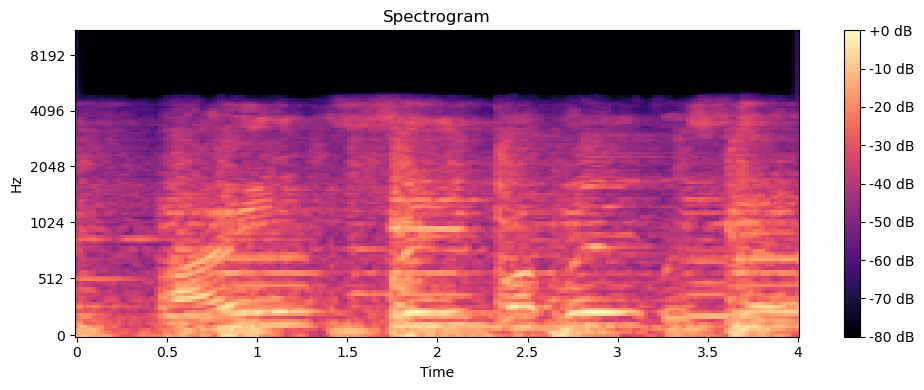

(128, 173)


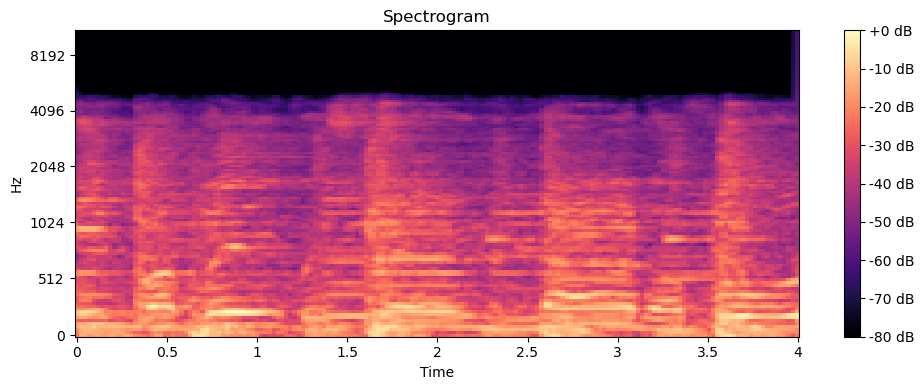

(128, 173)


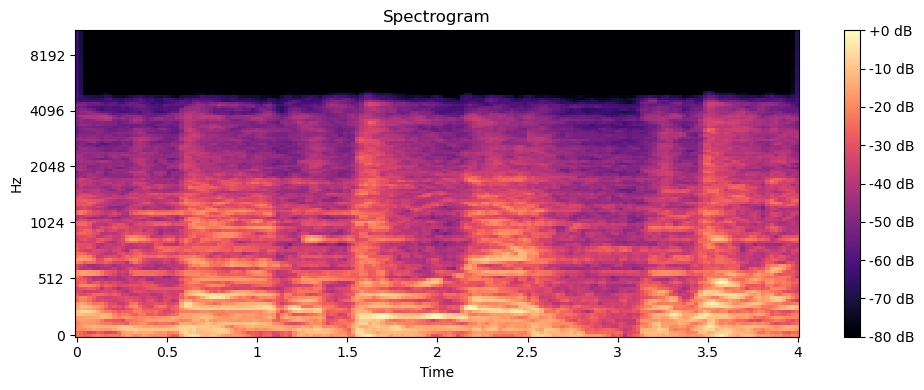

(128, 173)


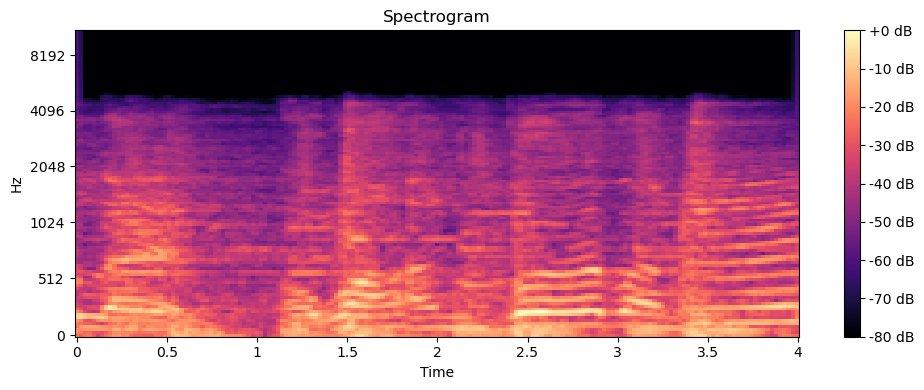

(128, 173)


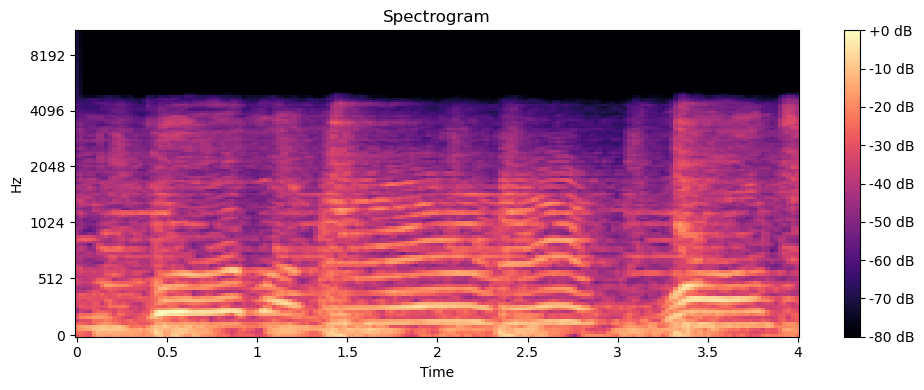

(128, 173)


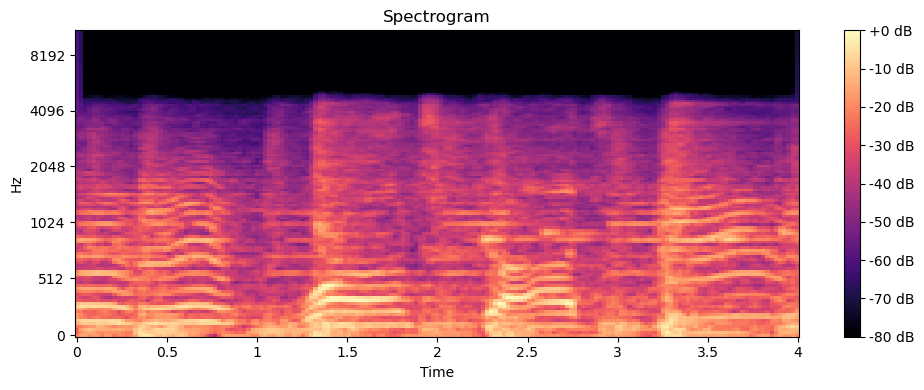

(128, 173)


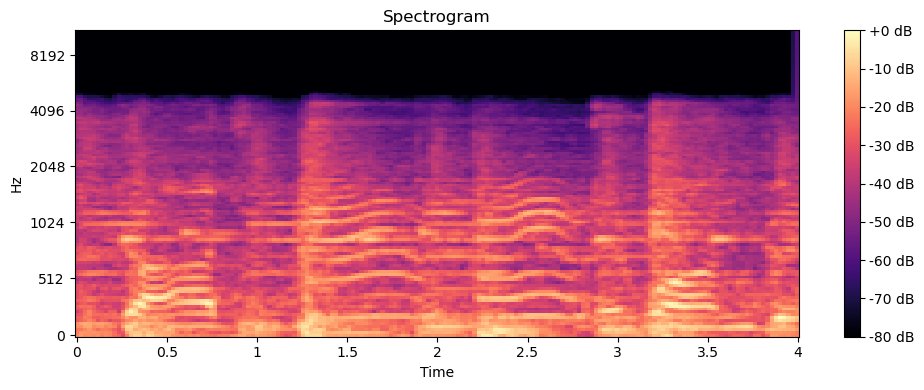

(128, 173)


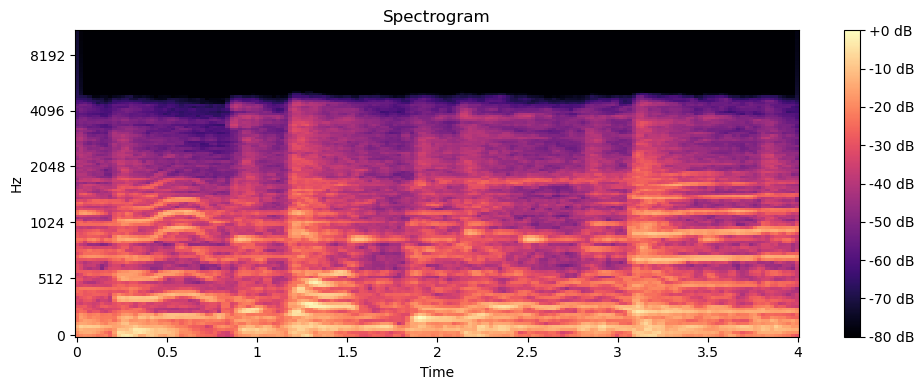

(128, 173)


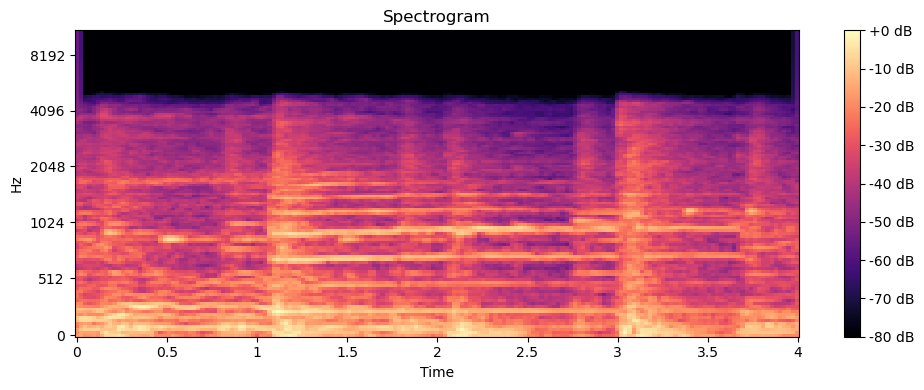

(128, 173)


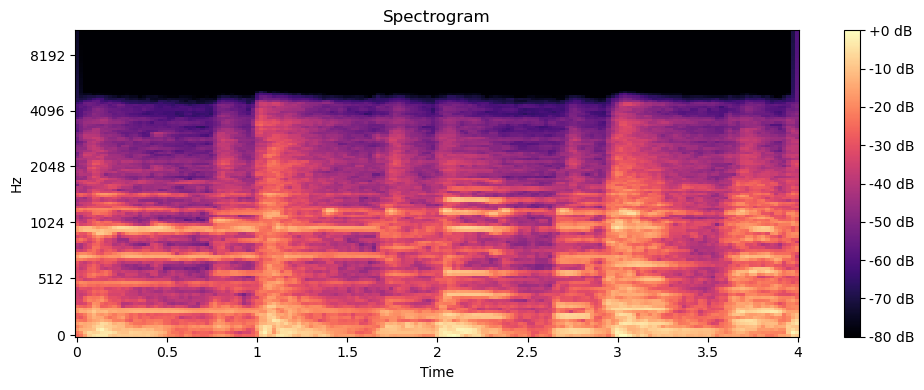

(128, 88)


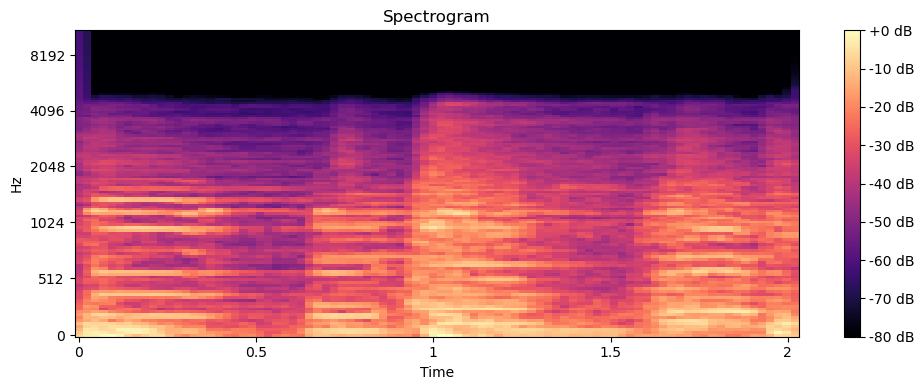

In [ ]:
#Spectrogram of Audio chunks
plot_melspectrogram_chunks(y=x,sr=sr)

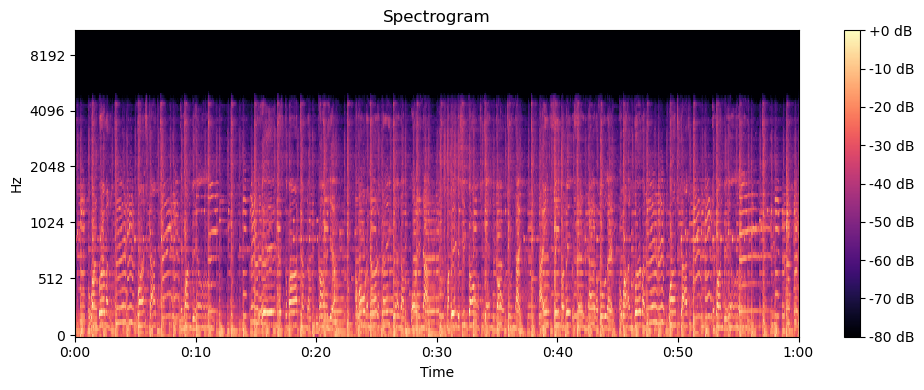

In [ ]:
#Spectrogram of Entire audio
plot_melspectrogram(y=x,sr=sr)

### Data Preprocessing

In [ ]:
# Define your folder structure
data_dir = './genres_original'
classes = ['blues', 'classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']

In [ ]:
# Load and preprocess audio data
def load_and_preprocess_data(data_dir, classes, target_shape=(150, 150)):
    data = []
    labels = []

    for i_class, class_name in enumerate(classes):
        class_dir = os.path.join(data_dir, class_name)
        print("Processing--",class_name)
        for filename in os.listdir(class_dir):
            if filename.endswith('.wav'):
                file_path = os.path.join(class_dir, filename)
                audio_data, sample_rate = librosa.load(file_path, sr=None)
                # Perform preprocessing (e.g., convert to Mel spectrogram and resize)
                # Define the duration of each chunk and overlap
                chunk_duration = 4  # seconds
                overlap_duration = 2  # seconds

                # Convert durations to samples
                chunk_samples = chunk_duration * sample_rate
                overlap_samples = overlap_duration * sample_rate

                # Calculate the number of chunks
                num_chunks = int(np.ceil((len(audio_data) - chunk_samples) / (chunk_samples - overlap_samples))) + 1

                # Iterate over each chunk
                for i in range(num_chunks):
                    # Calculate start and end indices of the chunk
                    start = i * (chunk_samples - overlap_samples)
                    end = start + chunk_samples

                    # Extract the chunk of audio
                    chunk = audio_data[start:end]

                    # Compute the Mel spectrogram for the chunk
                    mel_spectrogram = librosa.feature.melspectrogram(y=chunk, sr=sr)

                #mel_spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sample_rate)
                    mel_spectrogram = resize(np.expand_dims(mel_spectrogram, axis=-1), target_shape)
                    data.append(mel_spectrogram)
                    labels.append(i_class)

    return np.array(data), np.array(labels)

In [ ]:
# Split data into training and testing sets
data, labels = load_and_preprocess_data(data_dir, classes)
#print("\nData:",data,"\nlabel",labels)

Processing-- blues


2024-04-13 21:13:02.067864: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-04-13 21:13:02.067885: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-04-13 21:13:02.067891: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-04-13 21:13:02.067918: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-13 21:13:02.067931: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Processing-- classical
Processing-- country
Processing-- disco
Processing-- hiphop
Processing-- jazz
Processing-- metal
Processing-- pop
Processing-- reggae
Processing-- rock


In [ ]:
data.shape

(14975, 150, 150, 1)

In [ ]:
labels.shape

(14975,)

In [ ]:
labels

array([0, 0, 0, ..., 9, 9, 9])

In [ ]:
labels = to_categorical(labels, num_classes=len(classes))  # Convert labels to one-hot encoding
labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
labels.shape

(14975, 10)

In [ ]:
data.shape

(14975, 150, 150, 1)

### Splitting Dataset into Training and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

## Building Model

In [ ]:
model = tf.keras.models.Sequential()

In [ ]:
X_train[0].shape

(150, 150, 1)

In [ ]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=X_train[0].shape))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [ ]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [ ]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [ ]:
model.add(tf.keras.layers.Dropout(0.3))

In [ ]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [ ]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [ ]:
model.add(Dropout(0.3))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(units=1200,activation='relu'))

In [ ]:
model.add(Dropout(0.45))

In [ ]:
#Output Layer
model.add(Dense(units=len(classes),activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      320       
                                                                 
 conv2d_1 (Conv2D)           (None, 148, 148, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 74, 74, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                   

In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
X_train.shape,y_train.shape

((11980, 150, 150, 1), (11980, 10))

In [ ]:
# Train the model
training_history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/30


2024-04-13 21:16:59.965351: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - 55s 146ms/step - loss: 2.0441 - accuracy: 0.2589 - val_loss: 1.7083 - val_accuracy: 0.3773
Epoch 2/30
375/375 [==============================] - 63s 169ms/step - loss: 1.4953 - accuracy: 0.4803 - val_loss: 1.3402 - val_accuracy: 0.5282
Epoch 3/30
375/375 [==============================] - 70s 186ms/step - loss: 1.1820 - accuracy: 0.5938 - val_loss: 1.0873 - val_accuracy: 0.6287
Epoch 4/30
375/375 [==============================] - 121s 324ms/step - loss: 0.9972 - accuracy: 0.6613 - val_loss: 0.9003 - val_accuracy: 0.6805
Epoch 5/30
375/375 [==============================] - 125s 333ms/step - loss: 0.8439 - accuracy: 0.7174 - val_loss: 0.8636 - val_accuracy: 0.7075
Epoch 6/30
375/375 [==============================] - 104s 277ms/step - loss: 0.7152 - accuracy: 0.7600 - val_loss: 0.6364 - val_accuracy: 0.7957
Epoch 7/30
375/375 [==============================] - 105s 280ms/step - loss: 0.6254 - accuracy: 0.7903 - val_loss: 0.6901 - val_accuracy:

In [ ]:
model.save("Trained_model.keras") #Mac
model.save("Trained_model.h5") #Windows

/Users/animesh/anaconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
training_history.history

{'loss': [2.04414439201355,
  1.4952642917633057,
  1.181951880455017,
  0.9971982836723328,
  0.8439061045646667,
  0.7152147889137268,
  0.625395655632019,
  0.5331851243972778,
  0.4362926185131073,
  0.36804428696632385,
  0.3324230909347534,
  0.28731462359428406,
  0.23576566576957703,
  0.20344886183738708,
  0.1910889893770218,
  0.17286115884780884,
  0.1369156390428543,
  0.11860688030719757,
  0.12269094586372375,
  0.11341264098882675,
  0.10235651582479477,
  0.09678223729133606,
  0.07576985657215118,
  0.09164571017026901,
  0.07609838992357254,
  0.08299942314624786,
  0.06942640990018845,
  0.05781461298465729,
  0.08085852861404419,
  0.06501983851194382],
 'accuracy': [0.25893154740333557,
  0.4803004860877991,
  0.5938230156898499,
  0.6612687706947327,
  0.7174457311630249,
  0.760016679763794,
  0.790317177772522,
  0.8205342292785645,
  0.8532554507255554,
  0.8764607906341553,
  0.8893155455589294,
  0.9032554030418396,
  0.9188647866249084,
  0.9335559010505676

In [ ]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

## Model Evaluation

In [ ]:
##Model Evaluation on Training set
train_accuracy=model.evaluate(X_train,y_train,verbose=0)
print(train_accuracy[1])

0.9922370910644531


In [ ]:
##Model Evaluation on Test set
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.903171956539154


## Accuracy and Loss Visualization

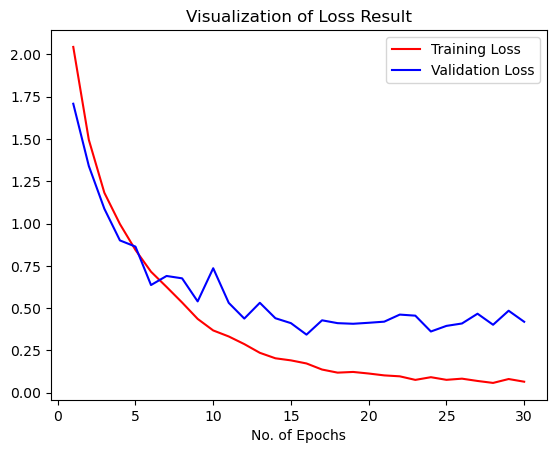

In [ ]:
#Visualization of Loss
epochs = [i for i in range(1,31)]
plt.plot(epochs,training_history.history['loss'],color='red',label='Training Loss')
plt.plot(epochs,training_history.history['val_loss'],color='blue',label='Validation Loss')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Loss Result')
plt.legend()
plt.show()

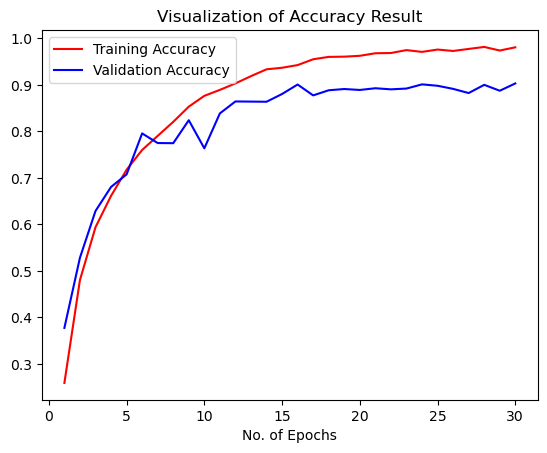

In [ ]:
#Accuracy Visualization
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Precision, Recall, Confusion Metrics calculation

In [ ]:
y_pred = model.predict(X_test)
y_pred

94/94 [==============================] - 3s 31ms/step


array([[2.7254093e-03, 8.2903311e-12, 3.7540111e-01, ..., 5.9241205e-01,
        3.4798944e-05, 2.5364380e-02],
       [4.4418907e-06, 7.3177510e-13, 2.8551943e-03, ..., 1.8759125e-09,
        6.0256824e-08, 2.4116185e-01],
       [3.1988033e-13, 3.2334172e-14, 6.6765161e-08, ..., 2.1072271e-09,
        1.1422692e-16, 2.2599864e-04],
       ...,
       [9.9998379e-01, 9.7760820e-11, 6.0241217e-07, ..., 1.8039408e-09,
        3.6080692e-07, 1.5264659e-08],
       [4.8074246e-05, 9.9490178e-01, 1.2385174e-04, ..., 1.0516345e-04,
        1.9187547e-04, 1.6082973e-04],
       [8.8991383e-31, 0.0000000e+00, 0.0000000e+00, ..., 4.2417284e-19,
        1.9540665e-18, 1.4546328e-27]], dtype=float32)

In [ ]:
y_pred.shape

(2995, 10)

In [ ]:
y_test.shape

(2995, 10)

In [ ]:
predicted_categories = np.argmax(y_pred, axis=1)
predicted_categories

array([7, 6, 6, ..., 0, 1, 4])

In [ ]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
true_categories = np.argmax(y_test, axis=1)
true_categories

array([7, 6, 6, ..., 0, 1, 4])

In [ ]:
classes

['blues',
 'classical',
 'country',
 'disco',
 'hiphop',
 'jazz',
 'metal',
 'pop',
 'reggae',
 'rock']

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(true_categories,predicted_categories)
# Precision Recall F1score
print(classification_report(true_categories,predicted_categories,target_names=classes))

              precision    recall  f1-score   support

       blues       0.94      0.86      0.90       302
   classical       0.91      0.96      0.93       298
     country       0.79      0.89      0.83       317
       disco       0.94      0.90      0.92       312
      hiphop       0.94      0.96      0.95       277
        jazz       0.86      0.94      0.90       311
       metal       0.95      0.97      0.96       302
         pop       0.96      0.85      0.90       289
      reggae       0.95      0.85      0.90       296
        rock       0.84      0.86      0.85       291

    accuracy                           0.90      2995
   macro avg       0.91      0.90      0.90      2995
weighted avg       0.91      0.90      0.90      2995



## Confusion Matrix Visualization

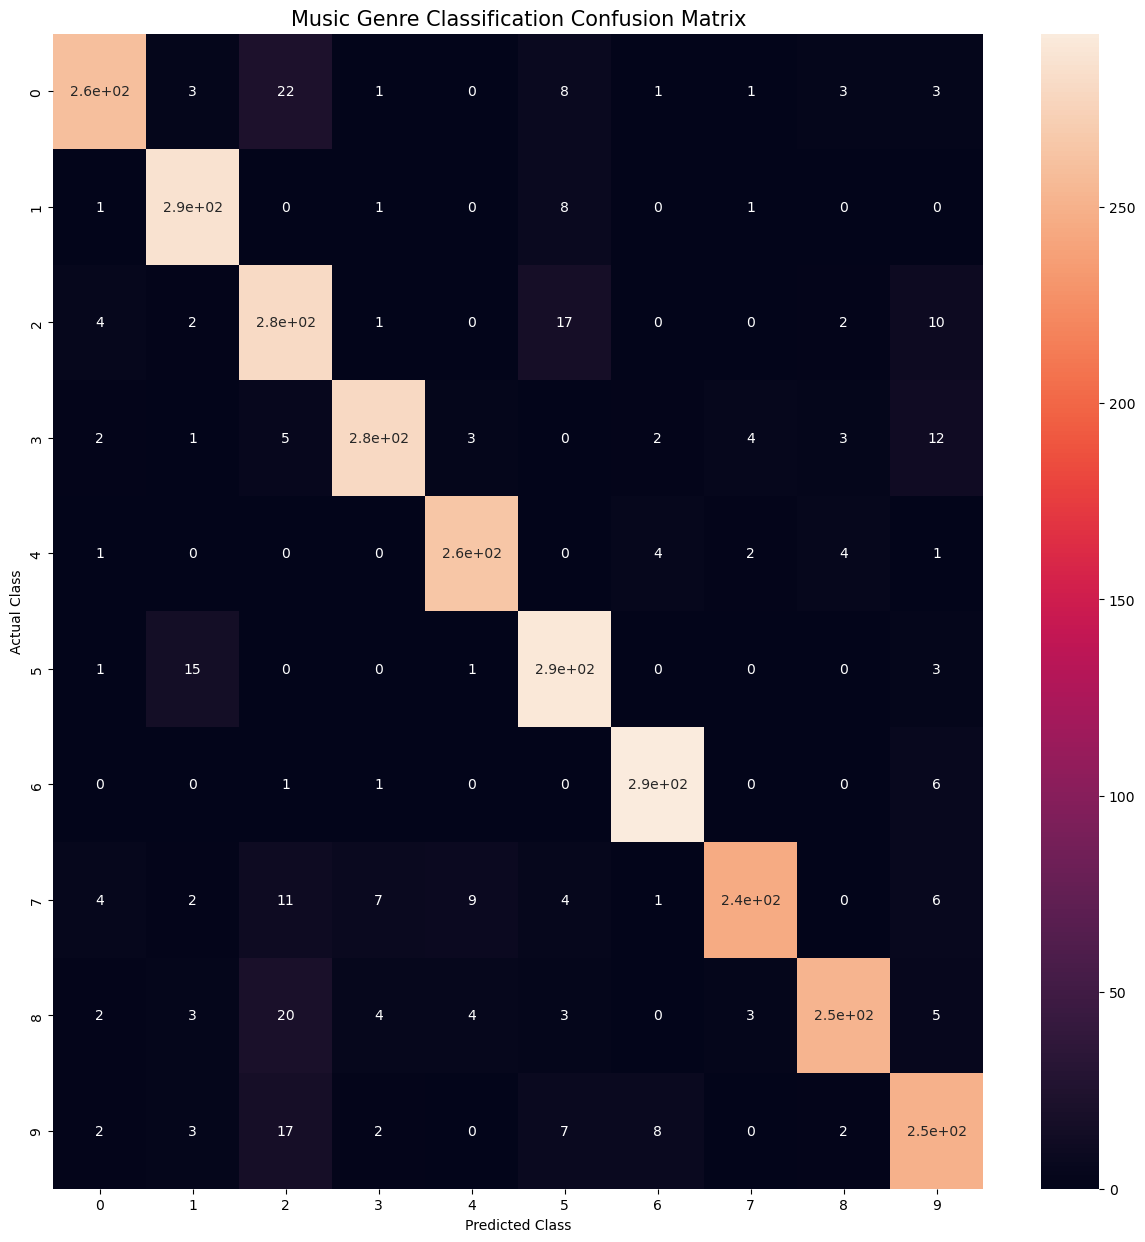

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 10)
plt.ylabel('Actual Class',fontsize = 10)
plt.title('Music Genre Classification Confusion Matrix',fontsize = 15)
plt.show()